In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Copy of diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print("\nData Types:")
print(data.dtypes)



Data Types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [ ]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Summary statistics for numerical columns.
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000

In [7]:
import pandas as pd

# Load the dataset again
data = pd.read_csv("/content/drive/MyDrive/Copy of diabetes.csv")


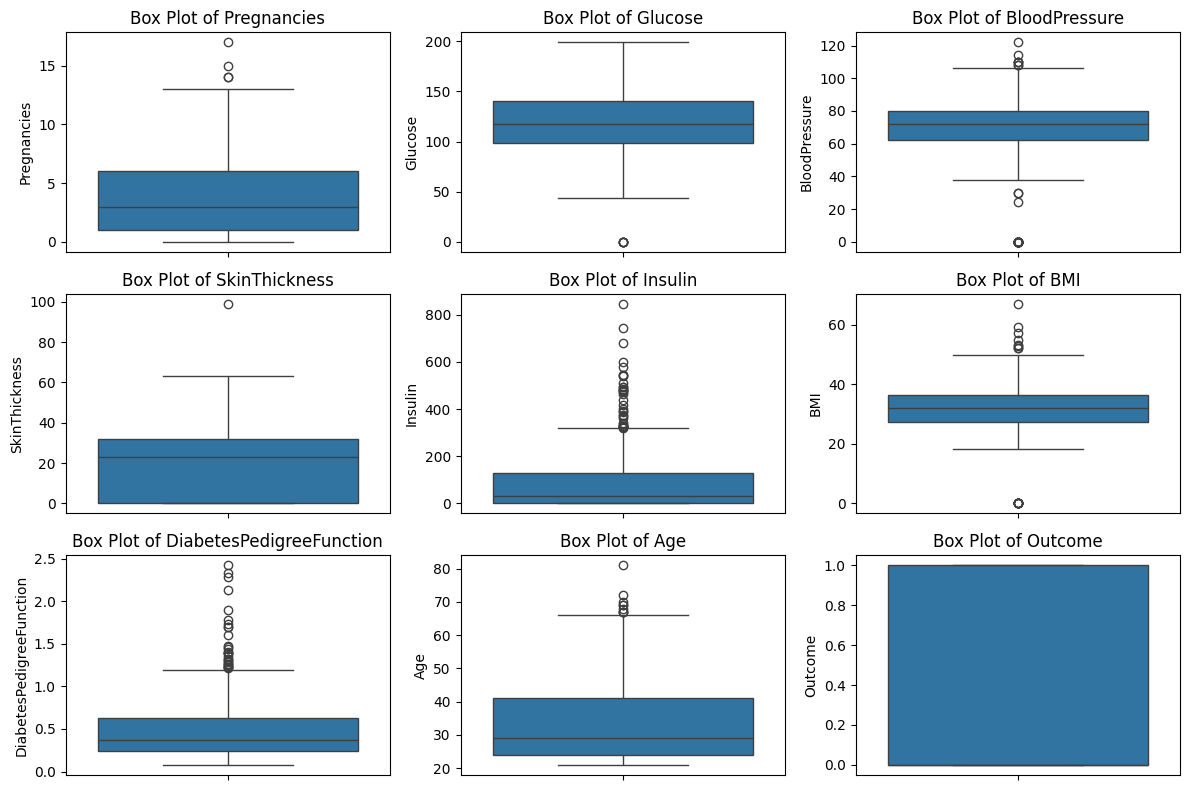

In [9]:
import pandas as pd
import numpy as np  # Ensure numpy is imported
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset again if necessary
data = pd.read_csv("/content/drive/MyDrive/Copy of diabetes.csv")

# Build box plots for numerical columns
plt.figure(figsize=(12, 8))

# Loop through numerical columns to create box plots
for i, col in enumerate(data.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(3, 3, i)  # Adjust the grid size based on the number of columns
    sns.boxplot(data[col])
    plt.title(f"Box Plot of {col}")
    plt.tight_layout()

plt.show()



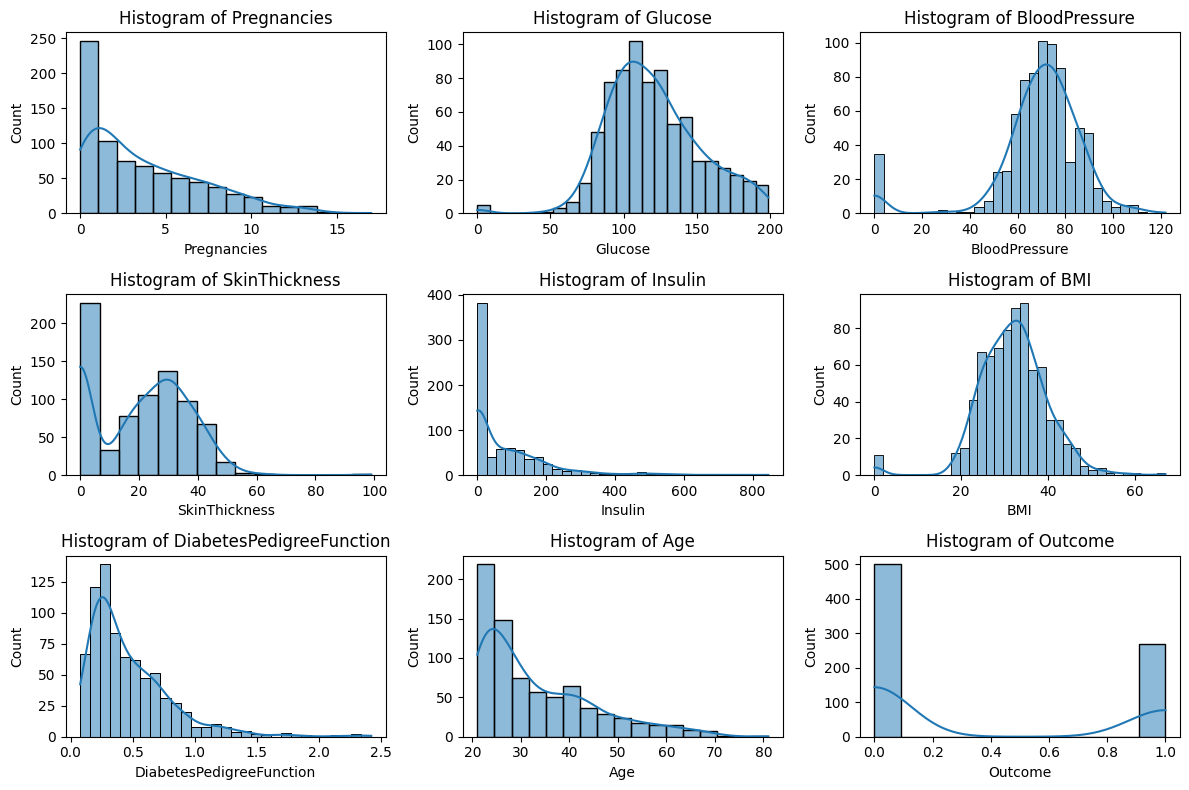

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Build histograms for numerical columns
plt.figure(figsize=(12, 8))

# Loop through numerical columns to create histograms
for i, col in enumerate(data.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(3, 3, i)  # Adjust the grid size based on the number of columns
    sns.histplot(data[col], kde=True)  # kde=True adds a kernel density estimate to the histogram
    plt.title(f"Histogram of {col}")
    plt.tight_layout()

plt.show()


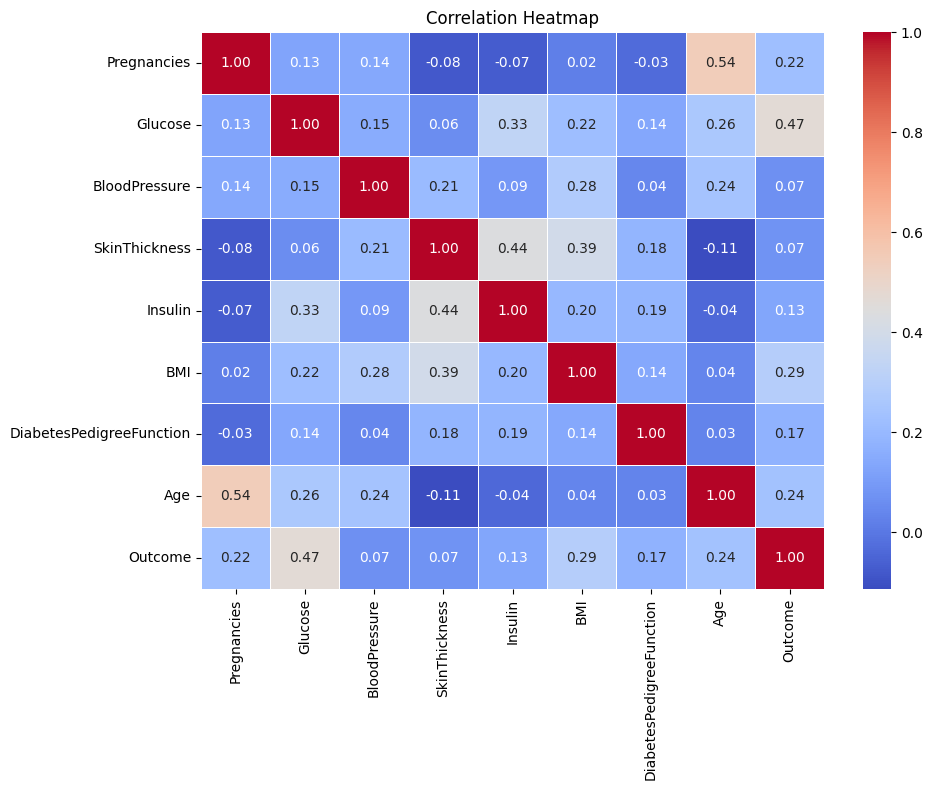

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Build the heatmap
plt.figure(figsize=(10, 8))  # Adjust the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()

plt.show()


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Copy of diabetes.csv")

# Feature Selection
X = data.drop('Outcome', axis=1)  # Features (all columns except 'Outcome')
y = data['Outcome']  # Target variable ('Outcome')

# Feature Scaling (Optional, if necessary)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the shape of the train and test sets
print(f"Training data: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing data: X_test: {X_test.shape}, y_test: {y_test.shape}")


Training data: X_train: (614, 8), y_train: (614,)
Testing data: X_test: (154, 8), y_test: (154,)


In [14]:
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    """
    Splits dataset into train and test sets.

    Arguments:
    X : np.ndarray
        Feature matrix.
    y : np.ndarray
        Target array.
    test_size : float
        Proportion of the dataset to include in the test split (0 < test_size < 1).
    random_seed : int
        Seed for reproducibility.

    Returns:
    X_train, X_test, y_train, y_test : np.ndarray
        Training and testing splits of features and target.
    """
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)  # Shuffle the indices

    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]

    #X_train, X_test = complete code
    #y_train, y_test = complete code

    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (614, 8)
Shape of X_test: (154, 8)
Shape of y_train: (614,)
Shape of y_test: (154,)


In [17]:
import numpy as np

def euclidean_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points in n-dimensional space.

    Arguments:
    point1 : np.ndarray
        The first point as a numpy array.
    point2 : np.ndarray
        The second point as a numpy array.

    Returns:
    float
        The Euclidean distance between the two points.

    Raises:
    ValueError: If the input points do not have the same dimensionality.
    """

    if point1.shape != point2.shape:
        raise ValueError("Points must have the same dimensions to calculate Euclidean distance.")

    # Calculate the Euclidean distance
    distance = np.sqrt(np.sum((point1 - point2)**2))

    return distance



In [18]:
try:

    point1 = np.array([3, 4])
    point2 = np.array([0, 0])


    result = euclidean_distance(point1, point2)


    expected_result = 5.0
    assert np.isclose(result, expected_result), f"Expected {expected_result}, but got {result}"

    print("Test passed successfully!")
except ValueError as ve:
    print(f"ValueError: {ve}")
except AssertionError as ae:
    print(f"AssertionError: {ae}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Test passed successfully!


In [19]:
def knn_predict_single(query, X_train, y_train, k=3):
    """
    Predict the class label for a single query using the K-nearest neighbors algorithm.

    Arguments:
    query : np.ndarray
        The query point for which the prediction is to be made.
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    k : int, optional
        The number of nearest neighbors to consider (default is 3).

    Returns:
    int
        The predicted class label for the query.
    """

    distances = [euclidean_distance(query, x) for x in X_train]


    sorted_indices = np.argsort(distances)


    nearest_indices = sorted_indices[:k]


    nearest_labels = y_train[nearest_indices]


    prediction = np.bincount(nearest_labels).argmax()

    return prediction


In [20]:
def knn_predict(X_test, X_train, y_train, k=3):
    """
    Predict the class labels for all test samples using the K-nearest neighbors algorithm.

    Arguments:
    X_test : np.ndarray
        The test feature matrix.
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    k : int, optional
        The number of nearest neighbors to consider (default is 3).

    Returns:
    np.ndarray
        An array of predicted class labels for the test samples.
    """

    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)


In [22]:
from sklearn.ensemble import RandomForestClassifier

try:
    # Take a sample from the test set
    X_test_sample = X_test[:5]
    y_test_sample = y_test[:5]

    # Train a Random Forest model (or any classifier you prefer)
    model = RandomForestClassifier()
    model.fit(X_train, y_train)  # Train the model with the training data

    # Make predictions on the sample test set
    predictions = model.predict(X_test_sample)

    print("Predictions:", predictions)
    print("Actual labels:", y_test_sample)

    # Assert to check if the shape of predictions matches the actual labels
    assert predictions.shape == y_test_sample.shape, (
        "The shape of predictions does not match the shape of the actual labels."
    )

    print("Test case passed successfully!")
except AssertionError as ae:
    print(f"AssertionError: {ae}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Predictions: [0 0 0 0 0]
Actual labels: 668    0
324    0
624    0
690    0
473    0
Name: Outcome, dtype: int64
Test case passed successfully!


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def compute_accuracy(y_true, y_pred):
    """
    Compute the accuracy of predictions.

    Arguments:
    y_true : np.ndarray
        The true labels.
    y_pred : np.ndarray
        The predicted labels.

    Returns:
    float
        The accuracy as a percentage (0 to 100).
    """
    # Calculate the number of correct predictions
    correct_predictions = sum(y_true == y_pred)
    total_predictions = len(y_true)

    # Calculate accuracy as percentage
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy

def knn_predict(X_test, X_train, y_train, k=3):
    """
    Predict the labels for X_test using KNN with k neighbors.

    Arguments:
    X_test : np.ndarray
        The test feature matrix.
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    k : int
        The number of neighbors to use for prediction.

    Returns:
    np.ndarray
        The predicted labels for X_test.
    """
    # Create and train the KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Make predictions
    predictions = knn.predict(X_test)
    return predictions

# Example of usage
try:
    # Perform prediction using KNN for k=3
    predictions = knn_predict(X_test, X_train, y_train, k=3)

    # Compute accuracy
    accuracy = compute_accuracy(y_test, predictions)

    # Print the result
    print(f"Accuracy of the KNN model on the test set: {accuracy:.2f}%")
except Exception as e:
    print(f"An unexpected error occurred during prediction or accuracy computation: {e}")


Accuracy of the KNN model on the test set: 70.13%


Accuracy for k=1: 61.69%
Accuracy for k=2: 65.58%
Accuracy for k=3: 70.13%
Accuracy for k=4: 69.48%
Accuracy for k=5: 68.83%
Accuracy for k=6: 70.13%
Accuracy for k=7: 68.18%
Accuracy for k=8: 68.83%
Accuracy for k=9: 68.18%
Accuracy for k=10: 68.18%
Accuracy for k=11: 71.43%
Accuracy for k=12: 72.08%
Accuracy for k=13: 71.43%
Accuracy for k=14: 72.08%
Accuracy for k=15: 72.08%
Accuracy for k=16: 74.68%
Accuracy for k=17: 75.32%
Accuracy for k=18: 76.62%
Accuracy for k=19: 75.97%
Accuracy for k=20: 75.97%


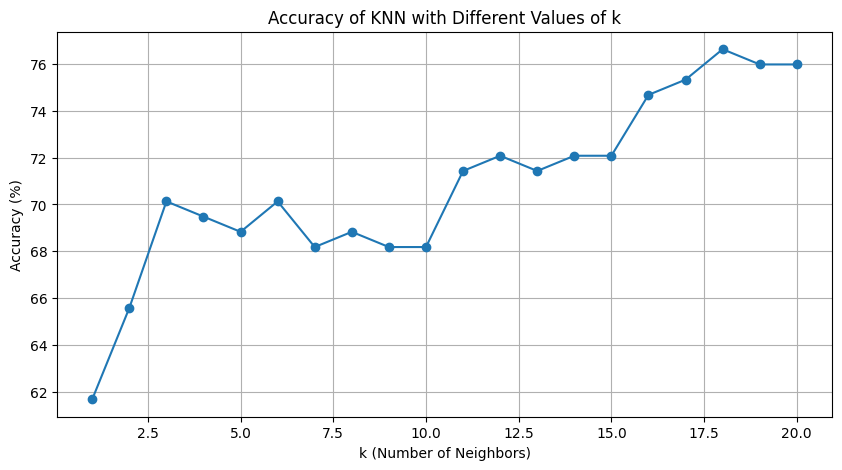

Experiment completed. Check the plot for the accuracy trend.


In [26]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def compute_accuracy(y_true, y_pred):
    """Compute accuracy as percentage."""
    return accuracy_score(y_true, y_pred) * 100

def experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values):
    """
    Run KNN predictions for different values of k and plot the accuracies.

    Arguments:
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    X_test : np.ndarray
        The test feature matrix.
    y_test : np.ndarray
        The test labels.
    k_values : list of int
        A list of k values to experiment with.

    Returns:
    dict
        A dictionary with k values as keys and their corresponding accuracies as values.
    """
    accuracies = {}

    for k in k_values:
        # Create and train the KNN model
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)

        # Make predictions on the test data
        predictions = knn.predict(X_test)

        # Compute accuracy and store it
        accuracy = compute_accuracy(y_test, predictions)
        accuracies[k] = accuracy
        print(f"Accuracy for k={k}: {accuracy:.2f}%")

    # Plot the accuracies for different k values
    plt.figure(figsize=(10, 5))
    plt.plot(k_values, list(accuracies.values()), marker='o')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy of KNN with Different Values of k')
    plt.grid(True)
    plt.show()

    return accuracies


# Define k values to experiment with
k_values = range(1, 21)

try:
    # Run the KNN experiment
    accuracies = experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values)
    print("Experiment completed. Check the plot for the accuracy trend.")
except Exception as e:
    print(f"An unexpected error occurred during the experiment: {e}")
